<a href="https://colab.research.google.com/github/Ahtesham519/jupyter-notebook_python/blob/main/visulization_via_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim 
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
try:
  from google.colab import files 
  uploaded = files.upload()
except ModuleNotFoundError:
  print("Not Using Colab")

Saving word2vec_cbow.bin to word2vec_cbow.bin


In [3]:
from gensim.models import Word2Vec, KeyedVectors  #To load the vectors
import warnings
warnings.filterwarnings('ignore')  #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt   #to generate the t-SNE plot
from sklearn.manifold import TSNE  #scikit learn's TSNE

import os

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
#Load model 
try:
  import google.colab
  model = KeyedVectors.load_word2vec_format('word2vec_cbow.bin', binary = True)
except ModuleNotFoundError:
  cwd = os.getcwd()
  model = KeyedVectors.load_word2vec_format(cwd +'\Models\word2vec_cbow.bin', binary = True)

In [23]:
#Preprocessing ours models vocabulary to make better visualizations

words_vocab = list(model.key_to_index)  #all the words in the vocabulary
print("Size of vocabulary: " , len(words_vocab))
print("Few words in vocabulary" , words_vocab[:50])

#let us remove the stop words from this , it will help us working the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]

print("Size of vocabulary without stopwords: " , len(words_vocab_without_sw))
print("Few words in vocabulary without stopwords " , words_vocab_without_sw[:30])

#The size didnt reduce much after removing the stop words so lets try visulizations onlya selected subset of words


Size of vocabulary:  161018
Few words in vocabulary ['the', 'of', 'and', 'in', 'to', 'was', 'is', 'for', 'on', 'as', 'by', 'with', 'he', 'at', 'from', 'that', 'his', 'it', 'an', 'were', 'are', 'also', 'which', 'or', 'this', 'first', 'new', 'be', 'has', 'one', 'had', 'after', 'who', 'their', 'not', 'its', 'but', 'two', 'her', 'they', 'th', 'she', 'school', 'references', 'time', 'have', 'all', 'other', 'when', 'been']
Size of vocabulary without stopwords:  159128
Few words in vocabulary without stopwords  ['school', 'references', 'time', 'year', 'bar', 'links', 'external', 'world', 'city', 'state', 'years', 'national', 'university', 'united', 'team', 'american', 'text', 'st', 'born', 'season', 'film', 'part', 'made', 'south', 'high', 'league', 'history', 'series', 'john', 'north']


In [24]:
#with the increease in the amount of data , it become more and more diffcult to visualize and interpret in practice, similar words are combined into groups for futher visulization.

keys = ['school' , 'year' , 'college' , 'city', 'states' , 'university' , 'team' , 'flim']
embedding_clusters = []
word_clusters =[]

for word in keys:
  embeddings = []
  words = []
  for similar_word , _ in model.most_similar(word, topn = 30):
    words.append(similar_word)
    embeddings.append(model[similar_word])
  embedding_clusters.append(embeddings)  #apending access vector of all similar words
  word_clusters.append(words)    #appending list of all similar words









In [25]:
print("Embeddings clusters: " , embedding_clusters[0][0])   #Access vector of the first word only.
print("word clusters :" , word_clusters[:2])


Embeddings clusters:  [-2.0008528  -1.3943557   1.4382704   0.8446866  -2.6626322   4.434941
 -2.874781    0.07160501  2.7645476   1.3397316  -1.5362843   1.9484733
 -1.538581    2.8054123  -0.1651442  -2.2072346  -1.2407984  -0.37212235
  1.7854097   1.51354     0.4680834  -6.1942625   2.0242858  -3.7782066
  0.57537895 -3.029885   -2.5517325  -2.4161081  -0.49409848  3.473683
  0.17055503 -3.9063861   3.884543    1.5628031  -2.2993872   2.1060982
 -3.3538942  -2.4706185   1.1629843  -0.9444056   1.4299889   0.32925856
  3.2923906  -0.6086113  -0.42672086  1.1591744  -3.224612    0.6084651
  2.366192    2.6875043   1.3349053  -3.0747583  -2.503866    1.5077431
 -1.024039    1.5941241   0.7730264  -0.42380166 -0.56361014  1.6036558
  1.9689867  -2.8361151   0.25759864 -5.638323    1.436891   -0.14189413
 -4.712218   -2.0199313  -0.9636327   3.3833733  -1.5988349   0.37275377
 -2.4628592  -1.6039482   0.21491958 -1.4248031  -1.4473001  -3.5625575
 -0.19743128  1.3642663   1.2659378  -2.

In [26]:
from nltk.inference.prover9 import test_convert_to_prover9
from sklearn.manifold import TSNE 
import numpy as np 

embedding_clusters = np.array(embedding_clusters)
n,m,k = embedding_clusters.shape   #getting the dimensions
tsne_model_en_2d = TSNE(perplexity =5 , n_components =2 , init= 'pca' , n_iter =1500 , random_state = 2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n*m,k))).reshape(n,m,2)


Hyperparameters of TSNE

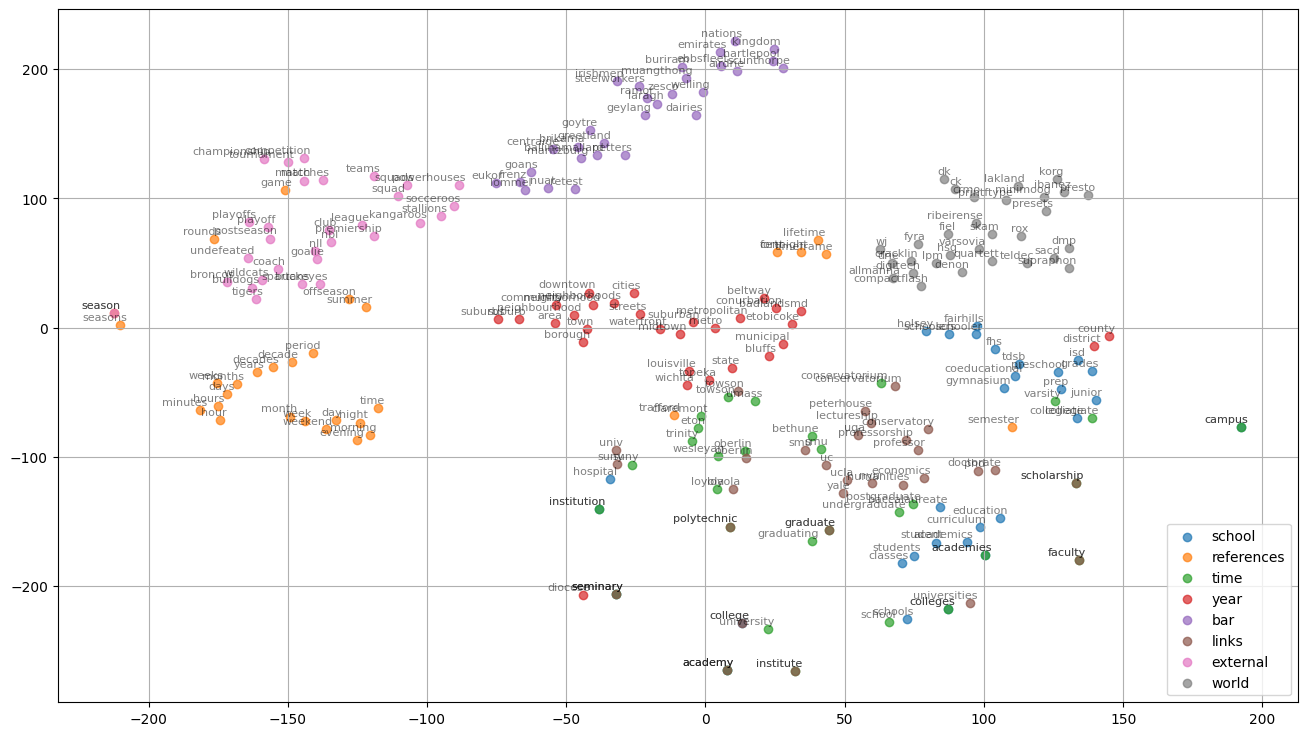

In [28]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np 
%matplotlib inline


#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels , embedding_clusters , word_clusters , a=0.7):
  plt.figure(figsize = (16,9))

  for label,embeddings , words in zip(labels, embedding_clusters , word_clusters):
    x = embeddings[:,0]
    y = embeddings[:,1]
    plt.scatter(x,y , alpha = a , label = label)
    for i , word in enumerate(words):
      plt.annotate(word , alpha = 0.5 , xy = (x[i] , y[i]) , xytext = (5,2) ,
                   textcoords = 'offset points ' , ha = 'right' , va = 'bottom' , size = 8)
  
  plt.legend(loc = 4)
  plt.grid(True)
  plt.show()

tsne_plot_similar_words(words_vocab_without_sw , embeddings_en_2d , word_clusters)




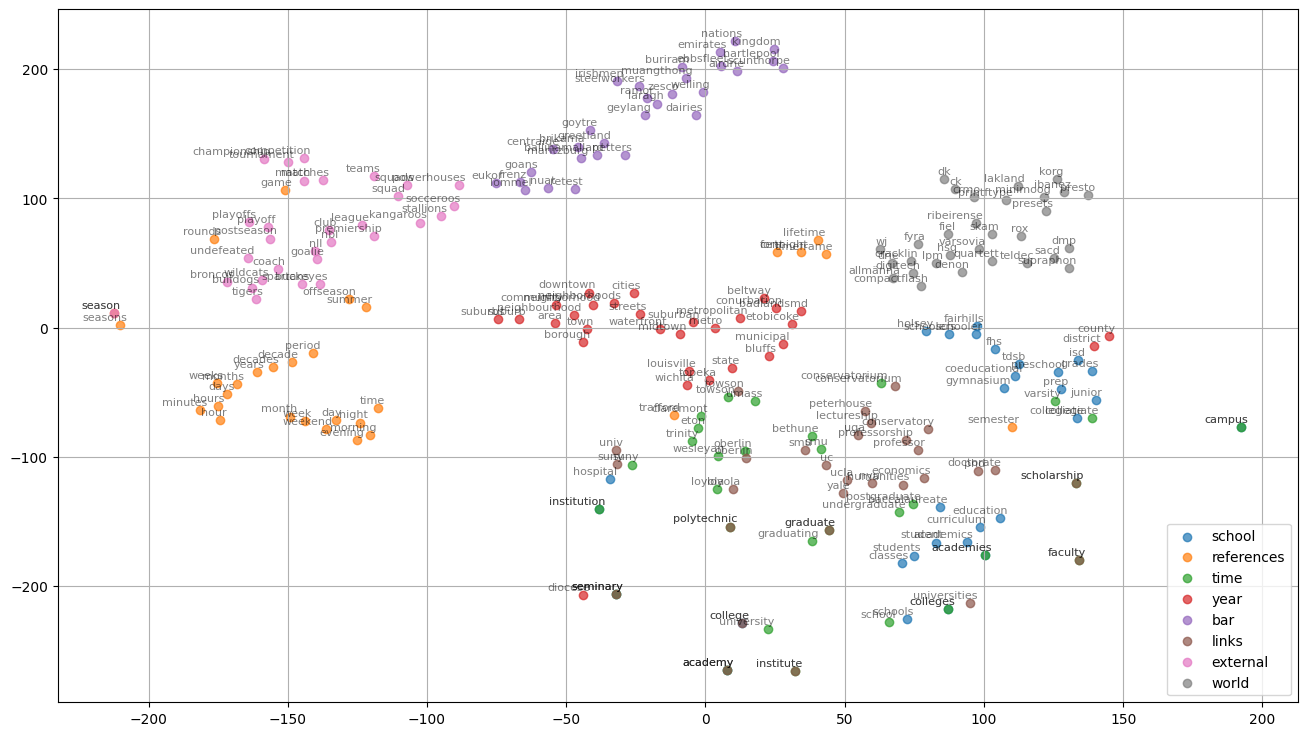

In [29]:
tsne_model_en_2d = TSNE(perplexity = 5 , n_components= 2, init = 'pca' , n_iter = 1500 , random_state = 2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n*m, k))).reshape(n, m ,2)
tsne_plot_similar_words(words_vocab_without_sw , embeddings_en_2d , word_clusters)